In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_PAC_method import GeNVariationalInference, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
from Experiments.foong import Setup
setup=Setup(device, layerwidth=20)

# Target density #

In [4]:
loss= setup.loss
logprior=setup.logprior
n_data_samples=setup.n_samples
param_count=setup.param_count
model=setup._model
print(n_data_samples)

200


# AE-Variational Distribution #

In [5]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001

GeN = GeNetEns(1, 1, 50, param_count, activation, 0.2, init_b, device)

Epoch [0/10000], Loss: 1.3678793907165527, Entropy -17.95947265625, Temp: 1.31326162815094, Learning Rate: 0.5


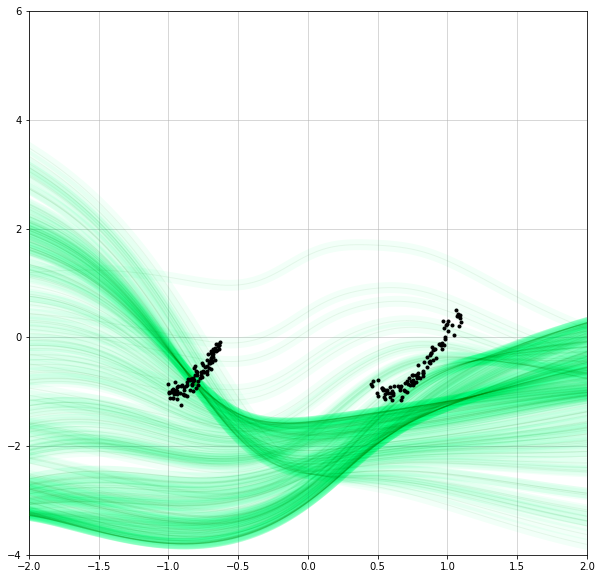

Epoch [1/10000], Loss: 1.2231301069259644, Entropy -15.852189064025879, Temp: 1.7014132738113403, Learning Rate: 0.5
Epoch [2/10000], Loss: 1.1381464004516602, Entropy -14.842920303344727, Temp: 2.108842372894287, Learning Rate: 0.5
Epoch [3/10000], Loss: 1.0880366563796997, Entropy -15.477604866027832, Temp: 2.514376401901245, Learning Rate: 0.5
Epoch [4/10000], Loss: 1.0579673051834106, Entropy -17.201269149780273, Temp: 2.9042255878448486, Learning Rate: 0.5
Epoch [5/10000], Loss: 1.0394614934921265, Entropy -16.153217315673828, Temp: 3.271132707595825, Learning Rate: 0.5
Epoch [6/10000], Loss: 1.0277411937713623, Entropy -15.118282318115234, Temp: 3.61220121383667, Learning Rate: 0.5
Epoch [7/10000], Loss: 1.0200978517532349, Entropy -17.811037063598633, Temp: 3.927044153213501, Learning Rate: 0.5
Epoch [8/10000], Loss: 1.014969825744629, Entropy -15.861566543579102, Temp: 4.216575622558594, Learning Rate: 0.5
Epoch [9/10000], Loss: 1.0114365816116333, Entropy -15.095483779907227, 

Epoch [73/10000], Loss: 1.000501036643982, Entropy -15.646773338317871, Temp: 7.5993194580078125, Learning Rate: 0.5
Epoch [74/10000], Loss: 1.0004982948303223, Entropy -17.462154388427734, Temp: 7.604954242706299, Learning Rate: 0.5
Epoch [75/10000], Loss: 1.000495433807373, Entropy -16.242258071899414, Temp: 7.610529899597168, Learning Rate: 0.5
Epoch [76/10000], Loss: 1.0004926919937134, Entropy -16.292329788208008, Temp: 7.616053104400635, Learning Rate: 0.5
Epoch [77/10000], Loss: 1.0004900693893433, Entropy -16.380035400390625, Temp: 7.621528625488281, Learning Rate: 0.5
Epoch [78/10000], Loss: 1.0004873275756836, Entropy -16.649742126464844, Temp: 7.6269612312316895, Learning Rate: 0.5
Epoch [79/10000], Loss: 1.0004847049713135, Entropy -15.690879821777344, Temp: 7.632354736328125, Learning Rate: 0.5
Epoch [80/10000], Loss: 1.0004820823669434, Entropy -15.008213996887207, Temp: 7.637713432312012, Learning Rate: 0.5
Epoch [81/10000], Loss: 1.0004795789718628, Entropy -16.78562164

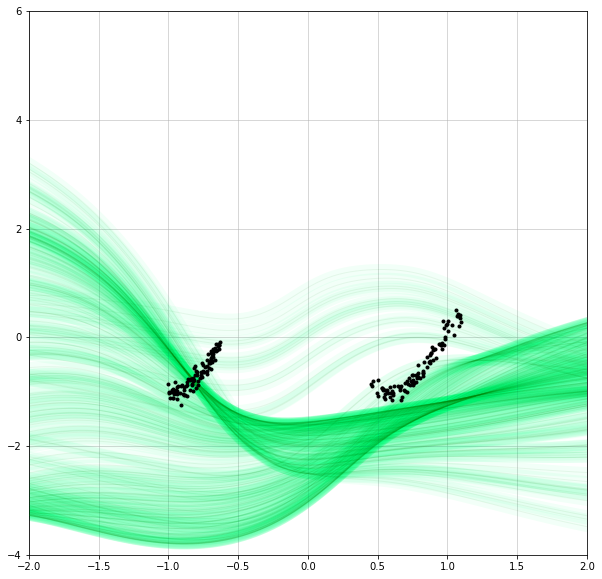

Epoch [101/10000], Loss: 1.0004326105117798, Entropy -16.458473205566406, Temp: 7.746099948883057, Learning Rate: 0.5
Epoch [102/10000], Loss: 1.0004304647445679, Entropy -17.65168571472168, Temp: 7.751166343688965, Learning Rate: 0.5
Epoch [103/10000], Loss: 1.000428318977356, Entropy -17.532203674316406, Temp: 7.756227970123291, Learning Rate: 0.5
Epoch [104/10000], Loss: 1.000426173210144, Entropy -17.914749145507812, Temp: 7.761285305023193, Learning Rate: 0.5
Epoch [105/10000], Loss: 1.0004240274429321, Entropy -16.517131805419922, Temp: 7.766339302062988, Learning Rate: 0.5
Epoch [106/10000], Loss: 1.0004217624664307, Entropy -17.095867156982422, Temp: 7.771389007568359, Learning Rate: 0.5
Epoch [107/10000], Loss: 1.0004196166992188, Entropy -15.907308578491211, Temp: 7.776435375213623, Learning Rate: 0.5
Epoch [108/10000], Loss: 1.0004175901412964, Entropy -15.549969673156738, Temp: 7.781478404998779, Learning Rate: 0.5
Epoch [109/10000], Loss: 1.0004154443740845, Entropy -16.16

Epoch [171/10000], Loss: 1.0003067255020142, Entropy -15.800580024719238, Temp: 8.089699745178223, Learning Rate: 0.5
Epoch [172/10000], Loss: 1.0003052949905396, Entropy -17.257875442504883, Temp: 8.094390869140625, Learning Rate: 0.5
Epoch [173/10000], Loss: 1.000303864479065, Entropy -17.859275817871094, Temp: 8.099075317382812, Learning Rate: 0.5
Epoch [174/10000], Loss: 1.0003024339675903, Entropy -16.196069717407227, Temp: 8.103751182556152, Learning Rate: 0.5
Epoch [175/10000], Loss: 1.0003011226654053, Entropy -16.841285705566406, Temp: 8.108420372009277, Learning Rate: 0.5
Epoch [176/10000], Loss: 1.0002996921539307, Entropy -15.0422945022583, Temp: 8.113080978393555, Learning Rate: 0.5
Epoch [177/10000], Loss: 1.000298261642456, Entropy -17.108318328857422, Temp: 8.117734909057617, Learning Rate: 0.5
Epoch [178/10000], Loss: 1.000296950340271, Entropy -15.576908111572266, Temp: 8.122380256652832, Learning Rate: 0.5
Epoch [179/10000], Loss: 1.0002955198287964, Entropy -16.2189

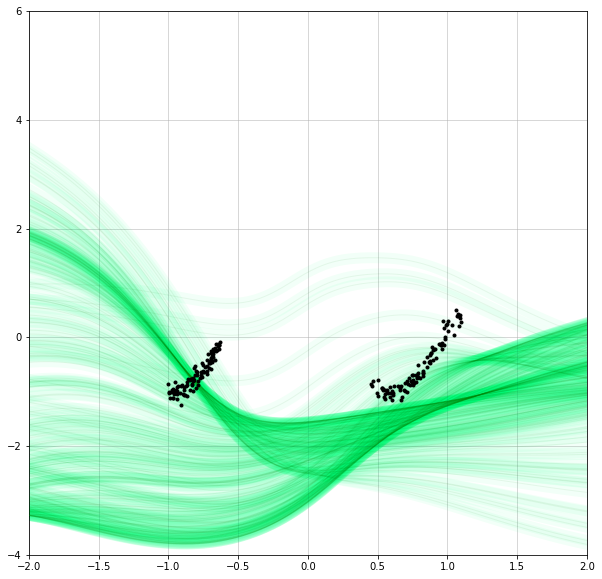

Epoch [201/10000], Loss: 1.0002673864364624, Entropy -15.586827278137207, Temp: 8.227068901062012, Learning Rate: 0.5
Epoch [202/10000], Loss: 1.000266194343567, Entropy -16.055212020874023, Temp: 8.231525421142578, Learning Rate: 0.5
Epoch [203/10000], Loss: 1.0002650022506714, Entropy -16.31182861328125, Temp: 8.235973358154297, Learning Rate: 0.5
Epoch [204/10000], Loss: 1.0002638101577759, Entropy -17.33612632751465, Temp: 8.240413665771484, Learning Rate: 0.5
Epoch [205/10000], Loss: 1.00026273727417, Entropy -16.183616638183594, Temp: 8.244845390319824, Learning Rate: 0.5
Epoch [206/10000], Loss: 1.0002615451812744, Entropy -17.013778686523438, Temp: 8.249269485473633, Learning Rate: 0.5
Epoch [207/10000], Loss: 1.000260353088379, Entropy -16.43687629699707, Temp: 8.25368595123291, Learning Rate: 0.5
Epoch [208/10000], Loss: 1.000259280204773, Entropy -14.727838516235352, Temp: 8.25809383392334, Learning Rate: 0.5
Epoch [209/10000], Loss: 1.0002580881118774, Entropy -16.566473007

Epoch [272/10000], Loss: 1.0001987218856812, Entropy -18.5909481048584, Temp: 8.523749351501465, Learning Rate: 0.5
Epoch [273/10000], Loss: 1.0001980066299438, Entropy -16.507930755615234, Temp: 8.5276517868042, Learning Rate: 0.5
Epoch [274/10000], Loss: 1.000197172164917, Entropy -18.365358352661133, Temp: 8.531545639038086, Learning Rate: 0.5
Epoch [275/10000], Loss: 1.0001964569091797, Entropy -16.667461395263672, Temp: 8.535432815551758, Learning Rate: 0.5
Epoch [276/10000], Loss: 1.0001956224441528, Entropy -15.395881652832031, Temp: 8.539312362670898, Learning Rate: 0.5
Epoch [277/10000], Loss: 1.0001949071884155, Entropy -17.386363983154297, Temp: 8.543184280395508, Learning Rate: 0.5
Epoch [278/10000], Loss: 1.0001941919326782, Entropy -16.346027374267578, Temp: 8.547050476074219, Learning Rate: 0.5
Epoch [279/10000], Loss: 1.0001933574676514, Entropy -18.383150100708008, Temp: 8.550908088684082, Learning Rate: 0.5
Epoch [280/10000], Loss: 1.000192642211914, Entropy -16.38241

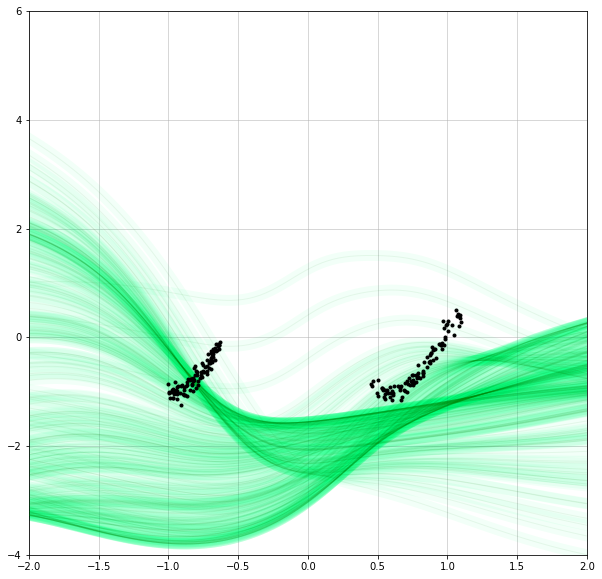

Epoch [301/10000], Loss: 1.0001792907714844, Entropy -17.448108673095703, Temp: 8.62656021118164, Learning Rate: 0.25
Epoch [302/10000], Loss: 1.0001789331436157, Entropy -15.806868553161621, Temp: 8.628411293029785, Learning Rate: 0.25
Epoch [303/10000], Loss: 1.0001786947250366, Entropy -15.422895431518555, Temp: 8.63025951385498, Learning Rate: 0.25
Epoch [304/10000], Loss: 1.000178337097168, Entropy -15.923137664794922, Temp: 8.63210678100586, Learning Rate: 0.25
Epoch [305/10000], Loss: 1.0001779794692993, Entropy -16.5238094329834, Temp: 8.633953094482422, Learning Rate: 0.25
Epoch [306/10000], Loss: 1.0001776218414307, Entropy -15.990795135498047, Temp: 8.635796546936035, Learning Rate: 0.25
Epoch [307/10000], Loss: 1.0001773834228516, Entropy -16.780052185058594, Temp: 8.637639999389648, Learning Rate: 0.25
Epoch [308/10000], Loss: 1.000177025794983, Entropy -16.585264205932617, Temp: 8.639481544494629, Learning Rate: 0.25
Epoch [309/10000], Loss: 1.0001766681671143, Entropy -1

Epoch [371/10000], Loss: 1.0001577138900757, Entropy -16.420820236206055, Temp: 8.754668235778809, Learning Rate: 0.25
Epoch [372/10000], Loss: 1.0001574754714966, Entropy -15.98751449584961, Temp: 8.756486892700195, Learning Rate: 0.25
Epoch [373/10000], Loss: 1.0001572370529175, Entropy -18.48351287841797, Temp: 8.758305549621582, Learning Rate: 0.25
Epoch [374/10000], Loss: 1.0001568794250488, Entropy -15.714016914367676, Temp: 8.760124206542969, Learning Rate: 0.25
Epoch [375/10000], Loss: 1.0001566410064697, Entropy -17.831525802612305, Temp: 8.761940956115723, Learning Rate: 0.25
Epoch [376/10000], Loss: 1.000156283378601, Entropy -17.009326934814453, Temp: 8.763758659362793, Learning Rate: 0.25
Epoch [377/10000], Loss: 1.000156044960022, Entropy -14.810956001281738, Temp: 8.765575408935547, Learning Rate: 0.25
Epoch [378/10000], Loss: 1.0001558065414429, Entropy -17.64267349243164, Temp: 8.767391204833984, Learning Rate: 0.25
Epoch [379/10000], Loss: 1.0001554489135742, Entropy 

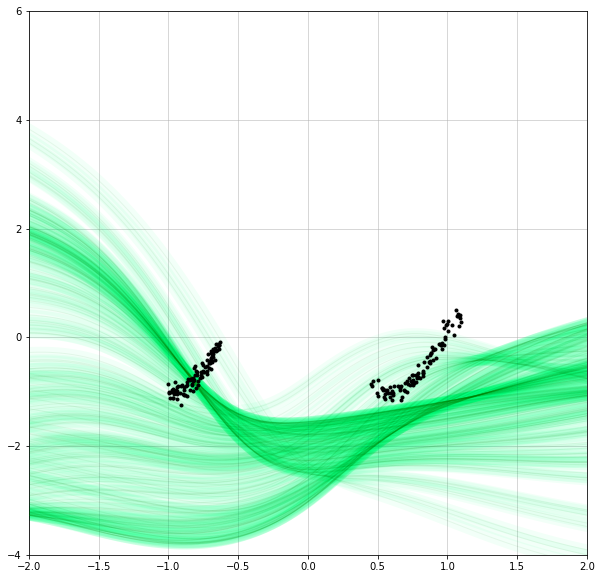

Epoch [401/10000], Loss: 1.0001493692398071, Entropy -17.23048210144043, Temp: 8.809040069580078, Learning Rate: 0.25
Epoch [402/10000], Loss: 1.000149130821228, Entropy -15.929798126220703, Temp: 8.810844421386719, Learning Rate: 0.25
Epoch [403/10000], Loss: 1.000148892402649, Entropy -17.84880256652832, Temp: 8.81264877319336, Learning Rate: 0.25
Epoch [404/10000], Loss: 1.0001486539840698, Entropy -16.994094848632812, Temp: 8.814453125, Learning Rate: 0.25
Epoch [405/10000], Loss: 1.0001482963562012, Entropy -15.653070449829102, Temp: 8.816256523132324, Learning Rate: 0.25
Epoch [406/10000], Loss: 1.000148057937622, Entropy -16.31104850769043, Temp: 8.818058013916016, Learning Rate: 0.25
Epoch [407/10000], Loss: 1.000147819519043, Entropy -14.660900115966797, Temp: 8.819860458374023, Learning Rate: 0.25
Epoch [408/10000], Loss: 1.0001475811004639, Entropy -16.31576919555664, Temp: 8.821661949157715, Learning Rate: 0.25
Epoch [409/10000], Loss: 1.0001472234725952, Entropy -15.434957

KeyboardInterrupt: 

In [9]:
%matplotlib inline
from tempfile import TemporaryDirectory





#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    Z=GeN(200).detach()
    fig=setup.makePlot(Z,device)
    plt.show()
    return
    
    

with TemporaryDirectory() as temp_dir:
    optimizer = GeNVariationalInference(loss,logprior,n_data_samples,
		                                    0, 100, 1000, 50, 100,
		                                    10000, .5, .000001, 100, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch)

In [7]:
[_ for _ in GeN.parameters()]+[torch.tensor(1.)]

[Parameter containing:
 tensor([[-0.7435],
         [ 0.1597],
         [ 0.9498],
         [-0.1508],
         [ 0.1586],
         [-0.8679],
         [-0.2544],
         [-0.4575],
         [-0.9285],
         [-0.9564],
         [ 0.6726],
         [ 0.4525],
         [-0.3099],
         [-0.1351],
         [ 0.4807],
         [ 0.9282],
         [ 0.1684],
         [ 0.4322],
         [ 0.6904],
         [ 0.1289],
         [-0.8048],
         [ 0.4073],
         [-0.4670],
         [-0.4623],
         [ 0.8527],
         [ 0.9560],
         [ 0.4619],
         [-0.7891],
         [ 0.3887],
         [-0.7409],
         [ 0.2090],
         [-0.5362],
         [-0.9189],
         [-0.0542],
         [ 0.0564],
         [ 0.9122],
         [-0.0176],
         [ 0.0663],
         [ 0.0906],
         [-0.1647],
         [-0.1921],
         [-0.6786],
         [-0.3258],
         [ 0.8055],
         [ 0.2699],
         [-0.3623],
         [ 0.0207],
         [-0.4746],
         [-0.5491

In [8]:
Z=GeN.components[0].hnet(X).detach()
fig=makePlot(setup,Z,colors,device)


NameError: name 'X' is not defined

In [46]:

Z = GeN(1000).detach()


In [58]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=2,init='pca',perplexity=50)
X_embedded =myTSNE.fit_transform(Z)
print(myTSNE.kl_divergence_)
X_embedded.shape

0.15273454785346985


(1000, 2)

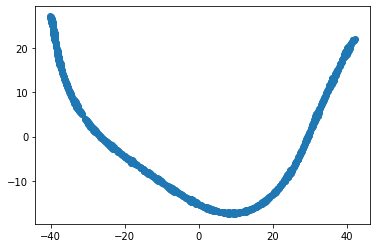

In [59]:
%matplotlib inline
plt.scatter(X_embedded[:,0],X_embedded[:,1])

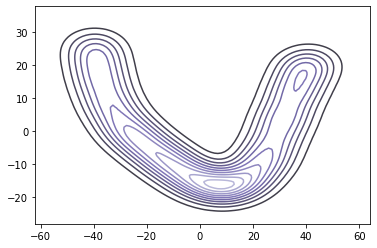

In [60]:
%matplotlib inline 
import seaborn as sns


sns.kdeplot(X_embedded[:,0],X_embedded[:,1], cmap="Purples_d")


In [56]:
from sklearn.manifold import MDS
Z=GeN(1000).detach()
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(Z)
X_transformed.shape


(1000, 2)

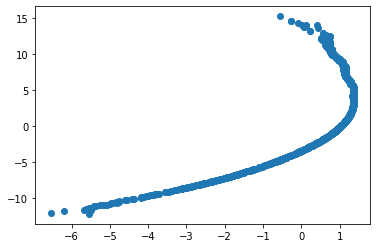

In [57]:
%matplotlib inline
plt.scatter(X_transformed[:,0],X_transformed[:,1])